
# Confidence interval (3)

This notebook covers the following cases:

1. unknown $\sigma$, data with normal distribution, small sample ($n < 30$)

## Imports and data

Required imports

In [1]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

Configure values for the problem space

In [2]:
mu = 450
n = 25
LoCpc = 95

Prepare a random sample to work with (with the given parameters). We have to specify a standard deviation to get a sample of data, however, after that we 'forget' the value for sigma and work as if the standard deviation is unknown.

In [3]:
sigma = 10
sample = np.random.normal(loc=mu, scale=sigma, size=n)

## Preparation

We calculate the sample mean, $\bar{x}$.

In [4]:
xmean = stats.mstats.tmean(sample)
xmean

452.3048043624335

We calculate the sample standard deviation to estimate the population standard deviation. The parameter `ddof` tells the function to divide by `n - ddof` rather than n. In our case, we want division by $n - 1$.

In [5]:
S = stats.tstd(sample, ddof=1)
S

10.653314183129837

Calculate the standard error from the population standard deviation estimate.

In [6]:
stdErr = S / math.sqrt(n)
stdErr

2.1306628366259672

The variable `df` represents the degrees of freedom of the t-distribution.

In [7]:
df = n - 1
df

24

## Confidence interval

Now we can go through the same steps as we do manually to determine the confidence interval.

Find the cut-off points in the t-distribution. We use the t-distribution when we know that the data distribution is roughly normal but we do not know the standard deviation and the sample size is small ($n < 30$). The first argument to `interval()` is the confidence as a fraction of 1. 

In [8]:
tAlphaHalvedNeg, tAlphaHalvedPos = stats.t.interval(LoCpc / 100, df)
print(tAlphaHalvedNeg, tAlphaHalvedPos)

-2.0638985616280205 2.0638985616280205


De-standardise the upper cut-off point.

In [9]:
halfIntervalWidth = tAlphaHalvedPos * stdErr
halfIntervalWidth

4.397471963826612

Print the confidence interval.

In [10]:
print('Confidence interval: {0:.3f} \u00b1 {1:.3f}'.format(xmean, halfIntervalWidth))

Confidence interval: 452.305 ± 4.397


**Rather than employing the step-by-step approach as in manual calculations, the interval can be obtained by getting the lower and upper cut-off values in one step:**

In [11]:
COl, COu = stats.t.interval(LoCpc / 100, df, xmean, stdErr)
print('Cut-off values: {0:.3f}, {1:.3f}'.format(COl, COu))
print('Confidence interval: {0:.3f} \u00b1 {1:.3f}, with {2}% confidence'.format(xmean, COu - xmean, LoCpc))

Cut-off values: 447.907, 456.702
Confidence interval: 452.305 ± 4.397, with 95% confidence


## Plot 

Prepare the data

In [12]:
halfFigWidthInStdErr = 3
pointsPerStdErr = 20
plotXMin = xmean - halfFigWidthInStdErr * stdErr
plotXMax = xmean + halfFigWidthInStdErr * stdErr
plotYMin = 0
plotYMax = stats.t.pdf(xmean, df, xmean, stdErr) * 1.2

x = np.linspace(plotXMin, plotXMax, pointsPerStdErr * halfFigWidthInStdErr * 2)

Plot

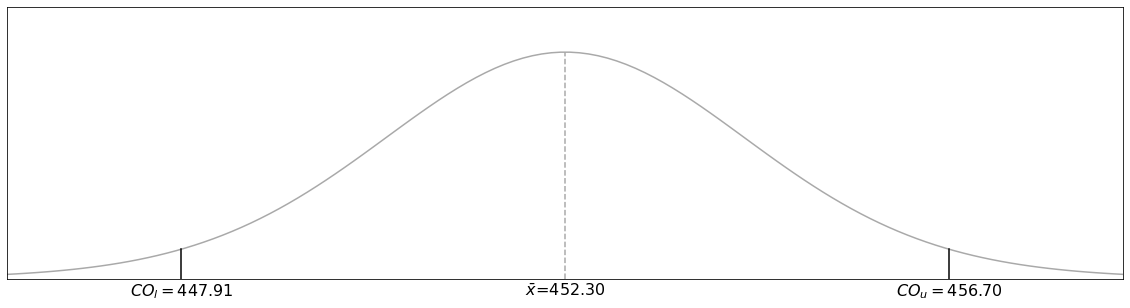

In [13]:
plt.figure(figsize=(20,5)) 
plt.xlim([plotXMin, plotXMax])
plt.tick_params(length=0)
plt.ylim([0, plotYMax])

# x-ticks with text only
plt.xticks([xmean - halfIntervalWidth, xmean, xmean + halfIntervalWidth], 
           [r'$CO_l={0:.2f}$'.format(xmean - halfIntervalWidth), 
            r'$\bar x$={0:.2f}'.format(xmean), 
            r'$CO_u={0:.2f}$'.format(xmean + halfIntervalWidth)], fontsize=16)

# no y-ticks
plt.yticks([])

# function
plt.plot(x, stats.t.pdf(x, df, xmean, stdErr), color='darkgray')

# vertical lines
plt.plot([xmean - halfIntervalWidth, xmean - halfIntervalWidth], 
         [0, stats.t.pdf(xmean - halfIntervalWidth, df, xmean, stdErr)], color='black')
plt.plot([xmean + halfIntervalWidth, xmean + halfIntervalWidth], 
         [0, stats.t.pdf(xmean - halfIntervalWidth, df, xmean, stdErr)], color='black')
plt.plot([xmean, xmean], [0, stats.t.pdf(xmean, df, xmean, stdErr)], color='darkgray', linestyle='--')
plt.show()